In [2]:
import cv2
import numpy as np

In [ ]:
img=cv2.imread('img/a.jpg')
img = cv2.resize(img,(500,400))
def remove(x):
    pass
cv2.namedWindow('demo')
cv2.createTrackbar('lb','demo',0,255,remove)
cv2.createTrackbar('lg','demo',0,255,remove)
cv2.createTrackbar('lr','demo',0,255,remove)

cv2.createTrackbar('ub','demo',0,255,remove)
cv2.createTrackbar('ug','demo',0,255,remove)
cv2.createTrackbar('ur','demo',0,255,remove)
while True:
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    Ld= cv2.geyTrackbarPos('lb','demo')
    Lg= cv2.geyTrackbarPos('lg','demo')
    Ld= cv2.geyTrackbarPos('lb','demo')

In [5]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('img/leaf.jpg')
if img is None:
    print("Error: Image not found or cannot be loaded.")
    exit()
img = cv2.resize(img, (500, 400))

# Function for trackbar (does nothing but required)
def remove(x):
    pass

# Create a window
cv2.namedWindow('demo')

# Create trackbars for the lower and upper HSV bounds
cv2.createTrackbar('lb', 'demo', 0, 255, remove)  # Lower bound for blue
cv2.createTrackbar('lg', 'demo', 0, 255, remove)  # Lower bound for green
cv2.createTrackbar('lr', 'demo', 0, 255, remove)  # Lower bound for red

cv2.createTrackbar('ub', 'demo', 0, 255, remove)  # Upper bound for blue
cv2.createTrackbar('ug', 'demo', 0, 255, remove)  # Upper bound for green
cv2.createTrackbar('ur', 'demo', 0, 255, remove)  # Upper bound for red

while True:
    # Convert the image to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Get current positions of the trackbars
    lb = cv2.getTrackbarPos('lb', 'demo')
    lg = cv2.getTrackbarPos('lg', 'demo')
    lr = cv2.getTrackbarPos('lr', 'demo')

    ub = cv2.getTrackbarPos('ub', 'demo')
    ug = cv2.getTrackbarPos('ug', 'demo')
    ur = cv2.getTrackbarPos('ur', 'demo')

    # Define the lower and upper bounds for the HSV values
    lower_bound = np.array([lb, lg, lr])
    upper_bound = np.array([ub, ug, ur])

    # Create a mask with the given bounds
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

    # Apply the mask to get the result
    result = cv2.bitwise_and(img, img, mask=mask)

    # Combine the original image, mask, and result into a single window
    combined = np.hstack((img, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), result))

    # Display the combined result in a single window
    cv2.imshow('result', result)
    cv2.imshow('mask', mask)
    cv2.imshow('hsv', hsv_img)
    cv2.imshow('remove', img)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Close all windows
cv2.destroyAllWindows()


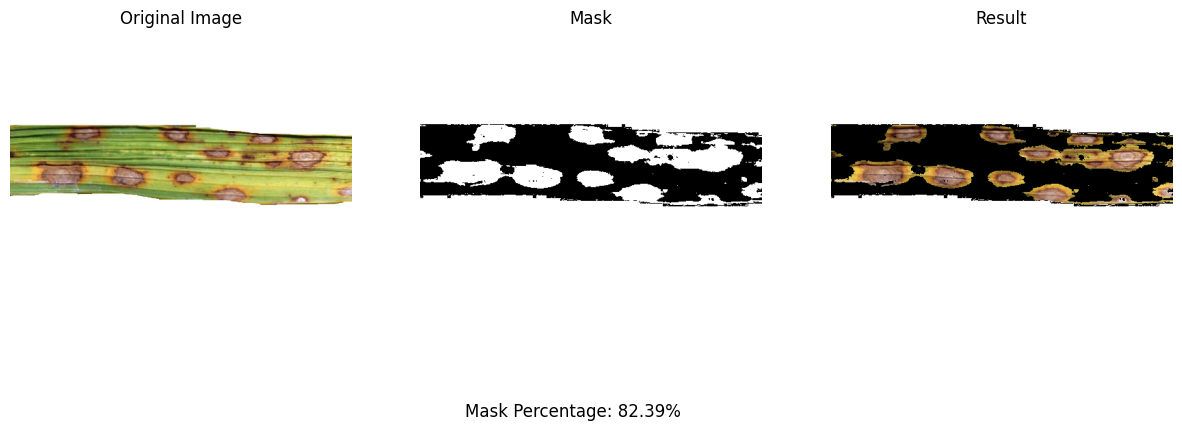

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('img/b.jpg')
if img is None:
    print("Error: Image not found or cannot be loaded.")
    exit()
img = cv2.resize(img, (500, 400))

# Set fixed values for the upper and lower bounds of HSV
lb, lg, lr = 0, 0, 0  # Lower bounds for blue, green, red (set to 0)
ub, ug, ur = 25, 255, 255  # Upper bounds for blue, green, red (set to 25)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the HSV values
lower_bound = np.array([lb, lg, lr])
upper_bound = np.array([ub, ug, ur])

# Create a mask with the given bounds
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

# Apply the mask to get the result
result = cv2.bitwise_and(img, img, mask=mask)

# Calculate mask percentage
total_pixels = img.size // 3  # Total number of pixels in the image (divided by 3 because of BGR channels)
mask_pixels = np.count_nonzero(mask)  # Number of non-zero pixels in the mask
mask_percentage = (mask_pixels / total_pixels) * 100

# Convert images from BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# Plotting the original image, mask, and result side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Result')
plt.imshow(result_rgb)
plt.axis('off')

# Display mask percentage
plt.figtext(0.5, 0.01, f'Mask Percentage: {mask_percentage:.2f}%', ha='center', va='center', fontsize=12, color='black')

plt.show()


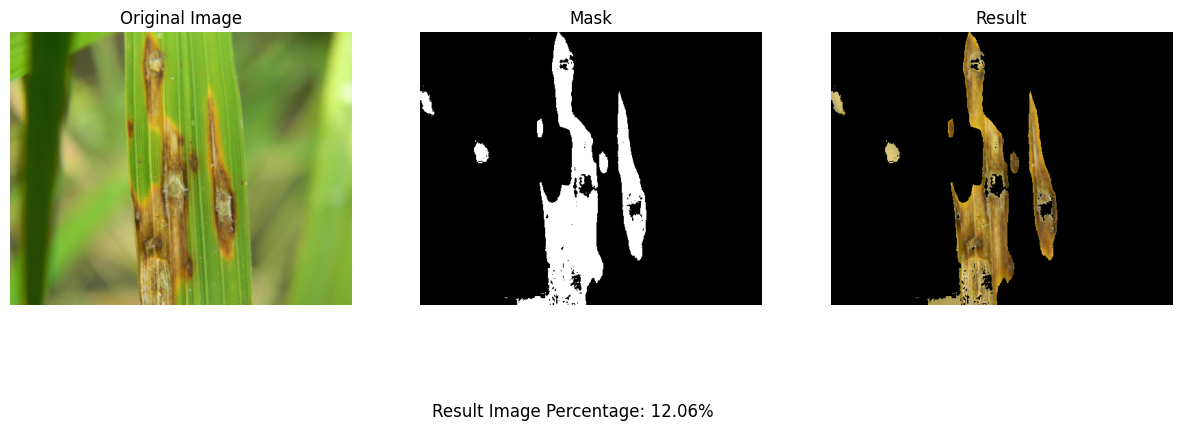

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('img/d.jpg')
if img is None:
    print("Error: Image not found or cannot be loaded.")
    exit()
img = cv2.resize(img, (500, 400))

# Set fixed values for the upper and lower bounds of HSV
lb, lg, lr = 0, 0, 0  # Lower bounds for blue, green, red (set to 0)
ub, ug, ur = 25, 255, 255  # Upper bounds for blue, green, red (set to 25)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the HSV values
lower_bound = np.array([lb, lg, lr])
upper_bound = np.array([ub, ug, ur])

# Create a mask with the given bounds
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

# Apply the mask to get the result
result = cv2.bitwise_and(img, img, mask=mask)

# Calculate the total number of pixels in the original image
total_pixels = img.size // 3  # Image is in BGR format, so divide by 3

# Calculate the number of non-zero pixels in the result image
visible_pixels = np.count_nonzero(result) // 3  # Number of non-zero (visible) pixels in result

# Calculate the percentage of visible pixels in the result relative to the original image
if total_pixels == 0:
    result_percentage = 0
else:
    result_percentage = (visible_pixels / total_pixels) * 100  # Percentage of visible pixels

# Convert images from BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# Plotting the original image, mask, and result side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Result')
plt.imshow(result_rgb)
plt.axis('off')

# Display result percentage
plt.figtext(0.5, 0.01, f'Result Image Percentage: {result_percentage:.2f}%', ha='center', va='center', fontsize=12, color='black')

plt.show()


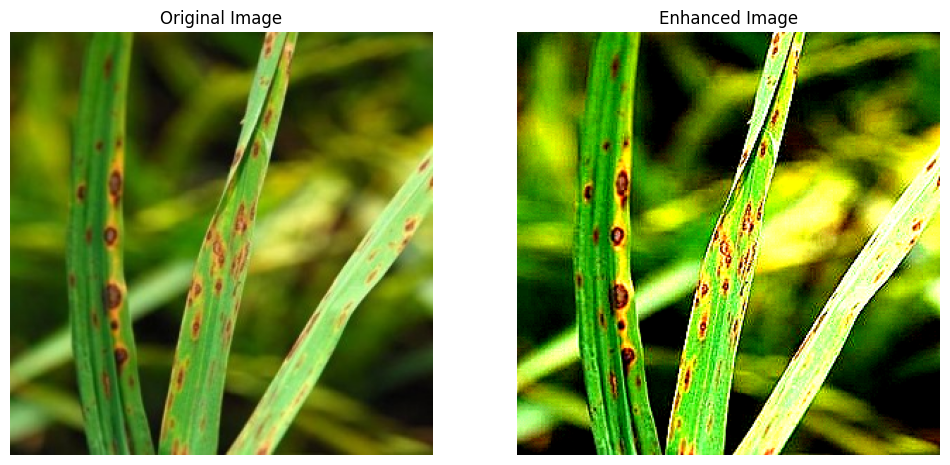

In [9]:
import cv2
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread('img/leaf.jpg')

# Apply sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Convert to a PIL image for further processing
pil_image = Image.fromarray(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

# Enhance contrast using PIL
contrast_enhancer = ImageEnhance.Contrast(pil_image)
enhanced_image = contrast_enhancer.enhance(1.5)  # Increase contrast by 1.5 times

# Enhance brightness
brightness_enhancer = ImageEnhance.Brightness(enhanced_image)
final_image = brightness_enhancer.enhance(1.2)  # Increase brightness by 1.2 times

# Convert the original and enhanced images back to numpy arrays for matplotlib
original_image_np = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
final_image_np = np.array(final_image)

# Display the original and enhanced images side by side using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title('Original Image')
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.imshow(final_image_np)
plt.title('Enhanced Image')
plt.axis('off')

# Show the images
plt.show()


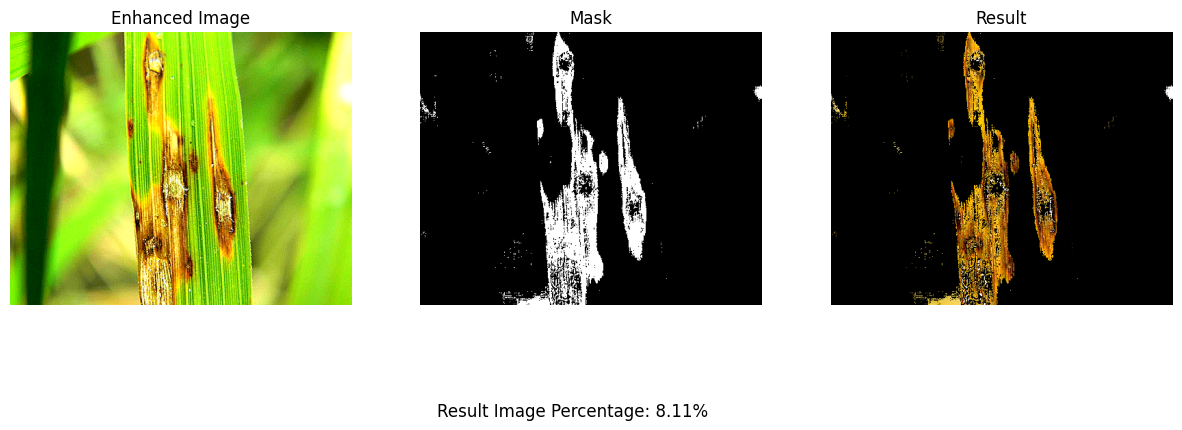

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# Load the image using OpenCV
original_img = cv2.imread('img/d.jpg')
if original_img is None:
    print("Error: Image not found or cannot be loaded.")
    exit()

# Resize the image for consistent processing
original_img = cv2.resize(original_img, (500, 400))

# Apply sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_img = cv2.filter2D(src=original_img, ddepth=-1, kernel=kernel)

# Convert to a PIL image for further processing
pil_img = Image.fromarray(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))

# Enhance contrast using PIL
contrast_enhancer = ImageEnhance.Contrast(pil_img)
enhanced_img = contrast_enhancer.enhance(1.5)  # Increase contrast by 1.5 times

# Enhance brightness
brightness_enhancer = ImageEnhance.Brightness(enhanced_img)
final_pil_img = brightness_enhancer.enhance(1.2)  # Increase brightness by 1.2 times

# Convert the final PIL image back to OpenCV format
final_img = cv2.cvtColor(np.array(final_pil_img), cv2.COLOR_RGB2BGR)

# Set fixed values for the upper and lower bounds of HSV
lb, lg, lr = 0, 0, 0  # Lower bounds for blue, green, red (set to 0)
ub, ug, ur = 25, 255, 255  # Upper bounds for blue, green, red (set to 25)

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the HSV values
lower_bound = np.array([lb, lg, lr])
upper_bound = np.array([ub, ug, ur])

# Create a mask with the given bounds
mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

# Apply the mask to get the result
result = cv2.bitwise_and(final_img, final_img, mask=mask)

# Calculate the total number of pixels in the original image
total_pixels = final_img.size // 3  # Image is in BGR format, so divide by 3

# Calculate the number of non-zero pixels in the result image
visible_pixels = np.count_nonzero(result) // 3  # Number of non-zero (visible) pixels in result

# Calculate the percentage of visible pixels in the result relative to the original image
if total_pixels == 0:
    result_percentage = 0
else:
    result_percentage = (visible_pixels / total_pixels) * 100  # Percentage of visible pixels

# Convert images from BGR to RGB for displaying with matplotlib
final_img_rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# Plotting the original enhanced image, mask, and result side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Enhanced Image')
plt.imshow(final_img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Result')
plt.imshow(result_rgb)
plt.axis('off')

# Display result percentage
plt.figtext(0.5, 0.01, f'Result Image Percentage: {result_percentage:.2f}%', ha='center', va='center', fontsize=12, color='black')

plt.show()
